In [7]:
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
  Using cached matplotlib-3.9.4-cp39-cp39-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp39-cp39-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp39-cp39-macosx_10_9_universal2.whl.metadata (101 kB)
  Using cached kiwisolver-1.4.7-cp39-cp39-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-11.1.0-cp39-cp39-macosx_11_0_arm64.whl.metadata (9.1 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
Using cached matplotlib-3.9.4-cp39-cp39-macosx_11_0_arm64.whl (7.8 MB)
Using cached contourpy-1.3.0-cp39-cp39-macosx_11_0_arm64.whl (249 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.56.0-cp39-cp39-macosx_10_9_universal2.whl (2.8 MB)
Using cached importlib_resources-6.5.2-py3-none-any.whl (37 kB)
Using cached kiwisolver-1.4.7-cp39-cp39-macosx_11_

In [9]:
import pandas as pd

raw_data = pd.read_csv("/Users/annaevseeva/Downloads/MARL Dynare/datasets_raw/rbc_state_dependent_GIRF.csv")
raw_data.head()

,y,c,k,l,z,ghat,r,w,invest
0,0.039794,-0.562498,2.386071,-1.103649,-0.008329,0.008020,0.126294,0.742966,-1.362769
1,0.038559,-0.563427,2.385413,-1.101367,-0.010928,0.013158,0.126202,0.739449,-1.370089
2,0.043375,-0.562812,2.385089,-1.100205,-0.006674,0.018575,0.126894,0.743102,-1.356403
3,0.039841,-0.563728,2.384501,-1.099508,-0.010568,0.017758,0.126487,0.738871,-1.368087
4,0.041046,-0.563412,2.384045,-1.099759,-0.009001,0.016711,0.126714,0.740327,-1.362974


In [10]:
print(raw_data.columns.to_list())

['y', 'c', 'k', 'l', 'z', 'ghat', 'r', 'w', 'invest']


In [6]:
column_mapping = {
    'y': 'Output',
    'c': 'Consumption',
    'k': 'Capital',
    'l': 'Hours Worked',
    'z': 'Total Factor Productivity',
    'ghat': 'Government Spending',
    'r': 'Annualized Interest Rate',
    'w': 'Real Wage',
    'invest': 'Investment'
}

# Предположим, что df — это ваш датафрейм
raw_data = raw_data.rename(columns=column_mapping)

# Вывод обновленного датафрейма
print(raw_data.head())
idx = raw_data.columns.get_loc('Consumption')
print(idx)

     Output  Consumption   Capital  Hours Worked  Total Factor Productivity  \
0  0.039794    -0.562498  2.386071     -1.103649                  -0.008329   
1  0.038559    -0.563427  2.385413     -1.101367                  -0.010928   
2  0.043375    -0.562812  2.385089     -1.100205                  -0.006674   
3  0.039841    -0.563728  2.384501     -1.099508                  -0.010568   
4  0.041046    -0.563412  2.384045     -1.099759                  -0.009001   

   Government Spending  Annualized Interest Rate  Real Wage  Investment  
0             0.008020                  0.126294   0.742966   -1.362769  
1             0.013158                  0.126202   0.739449   -1.370089  
2             0.018575                  0.126894   0.743102   -1.356403  
3             0.017758                  0.126487   0.738871   -1.368087  
4             0.016711                  0.126714   0.740327   -1.362974  
1


In [8]:
print(raw_data.columns.to_list())

['Output', 'Consumption', 'Capital', 'Hours Worked', 'Total Factor Productivity', 'Government Spending', 'Annualized Interest Rate', 'Real Wage', 'Investment']


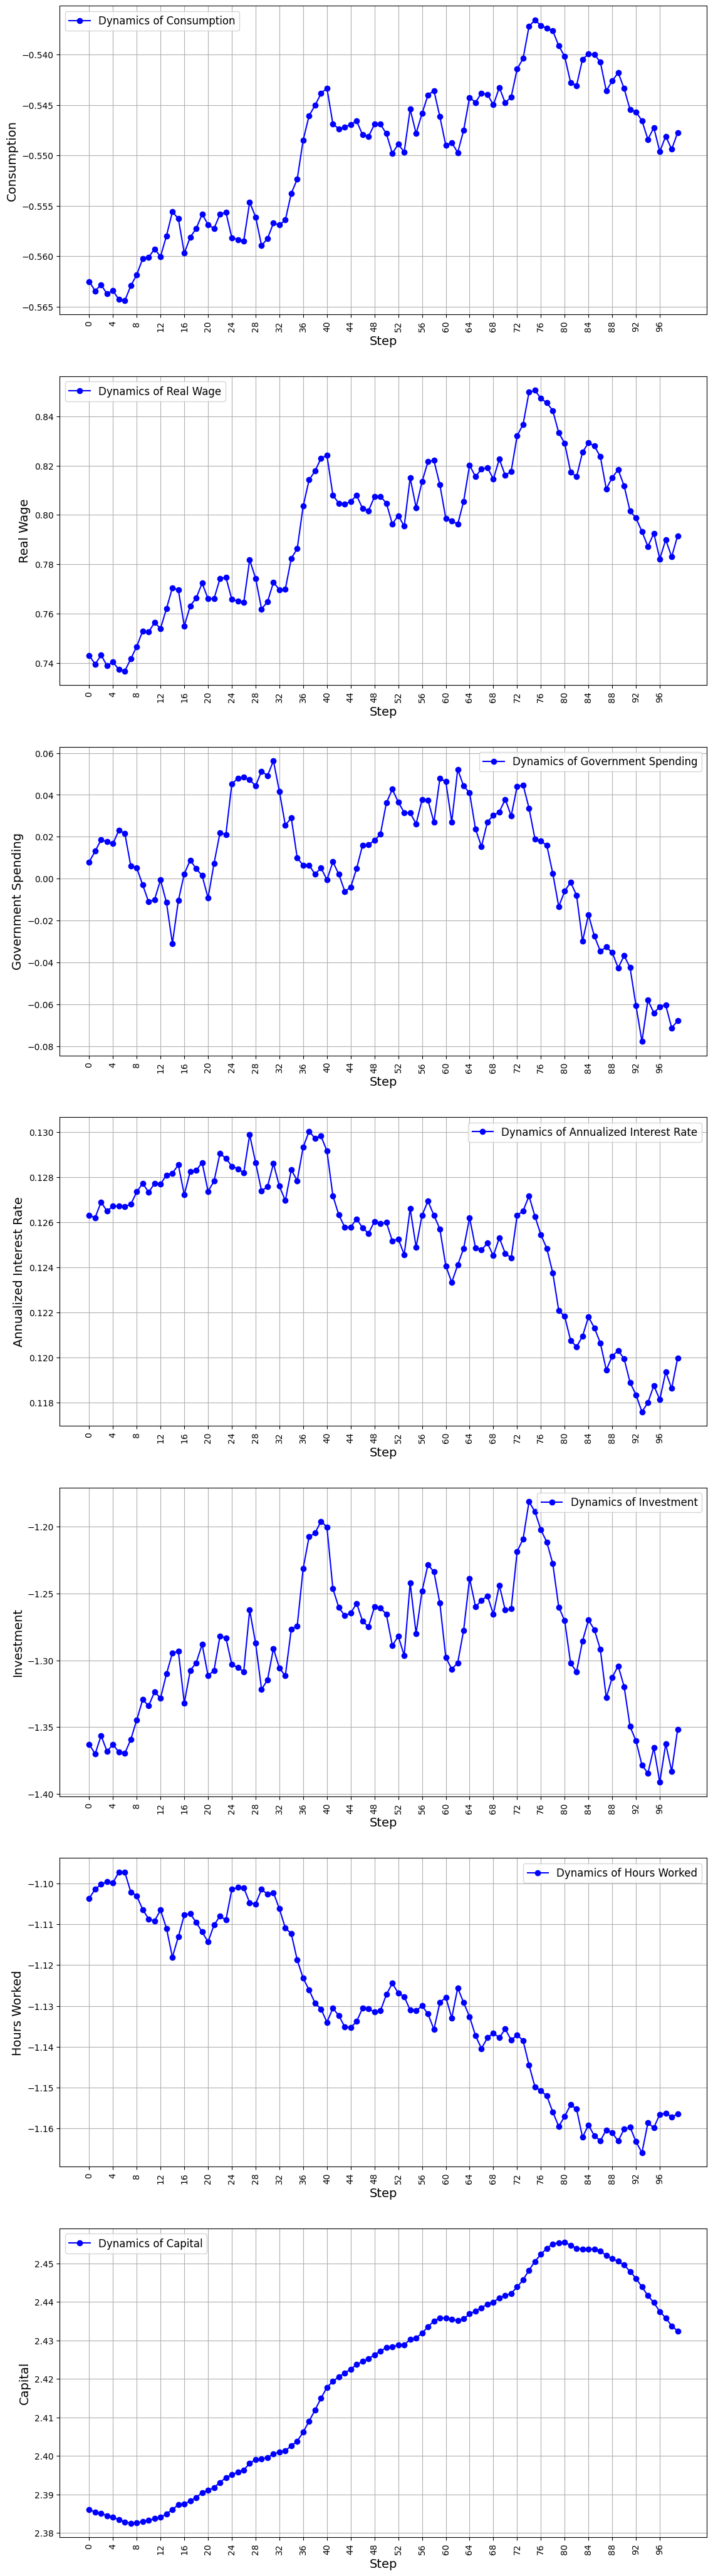

In [12]:
import matplotlib.pyplot as plt
import numpy as np

columns = ["Consumption", "Real Wage", "Government Spending", "Annualized Interest Rate", "Investment", "Hours Worked", "Capital"]
# columns = ["y", "c", "k", "invest"]


fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(13.33, 7.5 * len(columns)))

for idx, column in enumerate(columns):
    
    column_values = raw_data[column].to_numpy()
    
    steps = np.arange(len(column_values))
    
    ax = axes[idx]
    
    ax.plot(steps, column_values, marker='o', color='blue', label=f"Dynamics of {column}")
    
    
    ax.legend(fontsize=12)
    ax.set_xlabel("Step", fontsize=14)
    ax.set_ylabel(f"{column}", fontsize=14)
    ax.set_xticks(steps[::4])
    # ax.set_yticks(np.arange(np.min(column_values), np.max(column_values)))
    ax.set_xticklabels(ax.get_xticks(), rotation=90)
    ax.grid(True)
